<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Count_Contained_Permutations_(Very_Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Count Contained Permutations

You're given two non-empty strings: a big string and a small string. Write a function that returns the number of permutations of the small string that are contained in the big string.

Repeated permutations should be counted, and the small string counts as a permutation of itself.

Sample Input

```
bigString = "cbabcacabca"
smallString = "abc"
```



Sample Output

```
6 // "cba", "abc", "bca", "cab", "abc", "bca"
```



# Solution 1

Gen permutation for small string

In [ ]:
# Time = O(s*s! + b^2)
# Space = O(s*s!)

# b = len(bigString)
# s = len(smallString)

def countContainedPermutations(bigString, smallString):
    # time = O(s*s!), space = O(s*s!)
    permutations = getPermutations(list(smallString))
    permutation_count = 0

    # time = O(b^2)
    for i in range(len(bigString) - len(smallString) + 1):
      # time = O(b)
      considered_string = bigString[i:i+len(smallString)]
      if considered_string in permutations:
        permutation_count += 1
    return permutation_count

def getPermutations(array):
    permutations = set()
    permutationsHelper(0, array, permutations)
    return permutations

def permutationsHelper(i, array, permutations):
    if i == len(array) - 1:
        permutations.add(''.join(array[:]))
        
    else:
        for j in range(i, len(array)):
            swap(array, i, j)
            permutationsHelper(i + 1, array, permutations)
            swap(array, i, j)

def swap(array, i, j):
    array[i], array[j] = array[j], array[i]

In [ ]:
bigString = "cbabcacabca"
smallString = "abc"
countContainedPermutations(bigString, smallString)

6

In [ ]:
bigString = "an iceman is a manice who goes to the cinema"
smallString = "aceimn"
countContainedPermutations(bigString, smallString)

3

In [ ]:
bigString = "aaca"
smallString = "aac"
countContainedPermutations(bigString, smallString)

2

## Conceptual Note

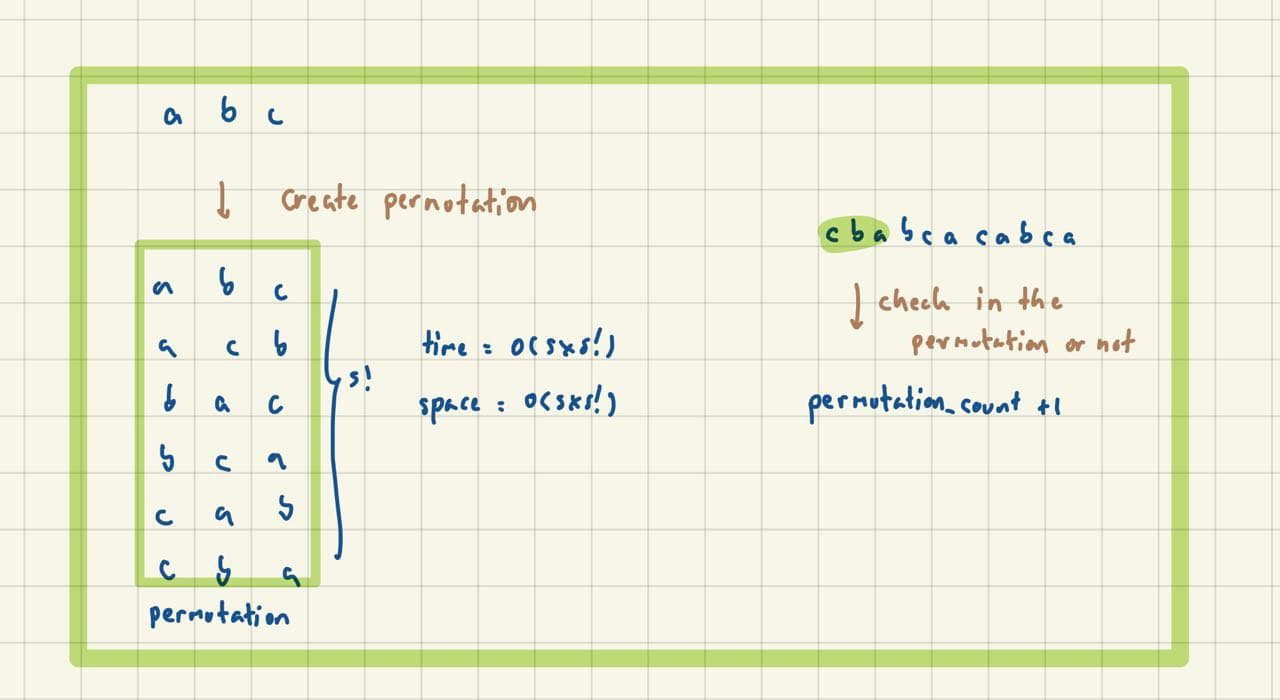

# Solution 2

moving windows

In [ ]:
# Time = O(bs)
# Space = O(s)

# b = len(bigString)
# s = len(smallString)

def countContainedPermutations(bigString, smallString):
  char_count_of_small_string = get_char_count(smallString)
  num_unique_char = len(char_count_of_small_string.keys())
  permutation_count = 0
  for i in range(len(bigString) - len(smallString) + 1):
    running_char_count = {}
    valid_char_count = 0
    for j in range(i, i + len(smallString)):
      char = bigString[j]
      if char in char_count_of_small_string:
        if char not in running_char_count:
          running_char_count[char] = 0
        running_char_count[char] += 1
        if running_char_count[char] == char_count_of_small_string[char]:
          valid_char_count += 1
      else:
        break
    if valid_char_count == num_unique_char:
      permutation_count += 1

  return permutation_count

def get_char_count(smallString):
  char_count = {}
  for idx in range(len(smallString)):
    char = smallString[idx]
    if char not in char_count:
      char_count[char] = 0
    char_count[char] += 1
  return char_count

In [ ]:
bigString = "cbabcacabca"
smallString = "abc"
countContainedPermutations(bigString, smallString)

6

In [ ]:
bigString = "an iceman is a manice who goes to the cinema"
smallString = "aceimn"
countContainedPermutations(bigString, smallString)

3

In [ ]:
bigString = "aaca"
smallString = "aac"
countContainedPermutations(bigString, smallString)

2

## Conceptual Note

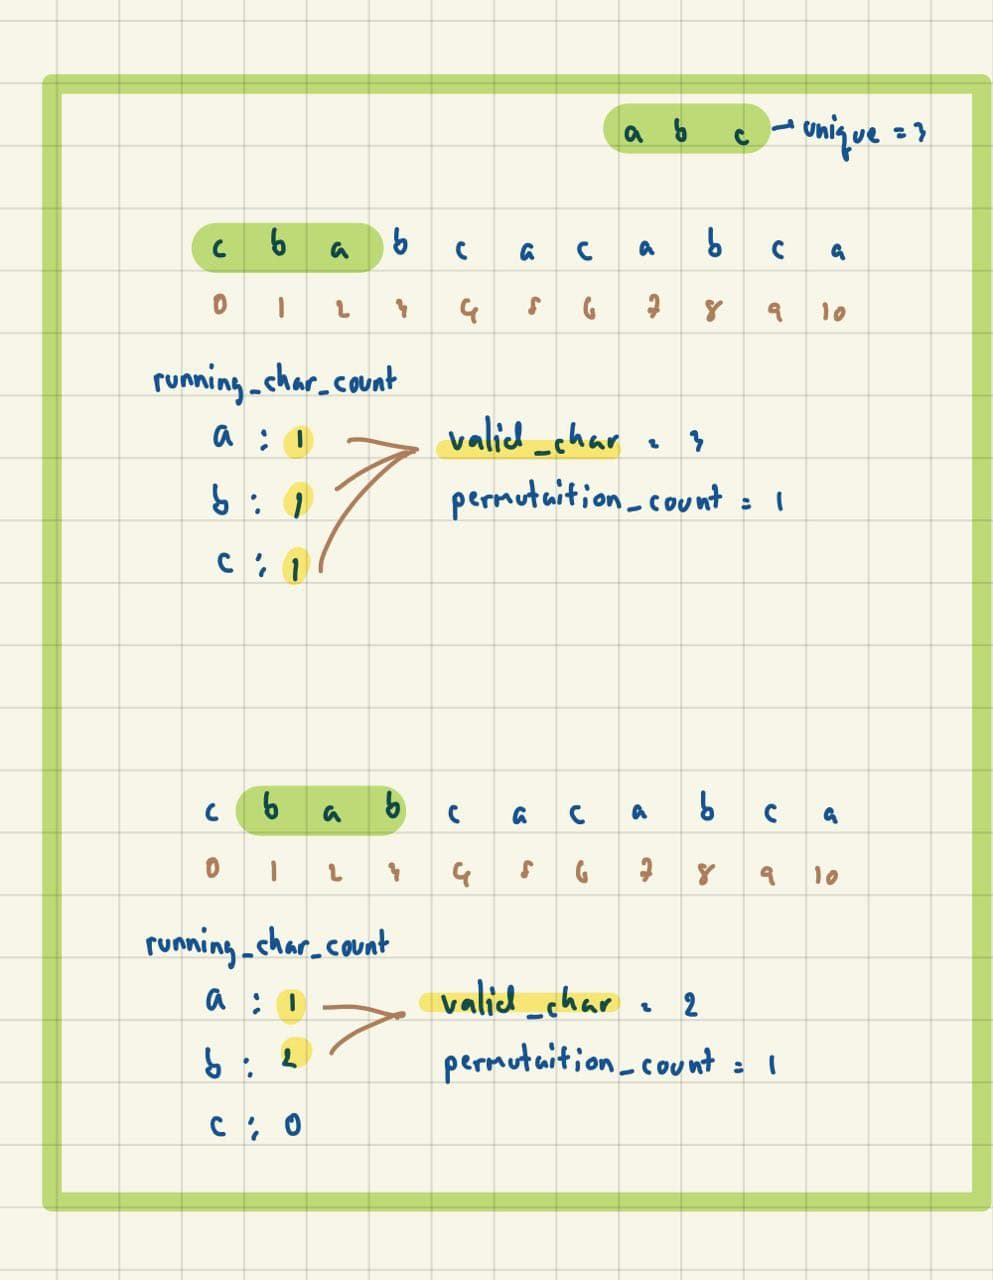

# Solution 3

2 pointers

In [ ]:
# Time = O(b + s)
# Space = O(s)

# b = len(bigString)
# s = len(smallString)

def countContainedPermutations(bigString, smallString):
  char_count_of_small_string = get_char_count(smallString)
  num_unique_char = len(char_count_of_small_string.keys())
  running_char_count = {}
  valid_char_count = 0
  permutation_count = 0
  left_idx = 0
  right_idx = 0
  while right_idx <= len(bigString) - 1:
    right_char = bigString[right_idx]
    if right_char in char_count_of_small_string:
      increase_char_count(right_char, running_char_count)
      if running_char_count[right_char] == char_count_of_small_string[right_char]:
        valid_char_count += 1
    
    if valid_char_count == num_unique_char:
      permutation_count += 1

    should_move_left_idx = right_idx - left_idx == len(smallString) - 1
    right_idx += 1
    if not should_move_left_idx:
      continue
    
    left_char = bigString[left_idx]
    if left_char in char_count_of_small_string:
      if running_char_count[left_char] == char_count_of_small_string[left_char]:
        valid_char_count -= 1
      decrease_char_count(left_char, running_char_count)
    left_idx += 1
  
  return permutation_count


def decrease_char_count(char, running_char_count):
  running_char_count[char] -= 1

def increase_char_count(char, running_char_count):
  if char not in running_char_count:
    running_char_count[char] = 0
  running_char_count[char] += 1

def get_char_count(smallString):
  char_count = {}
  for idx in range(len(smallString)):
    char = smallString[idx]
    if char not in char_count:
      char_count[char] = 0
    char_count[char] += 1
  return char_count

In [ ]:
bigString = "cbabcacabca"
smallString = "abc"
countContainedPermutations(bigString, smallString)

6

In [ ]:
bigString = "an iceman is a manice who goes to the cinema"
smallString = "aceimn"
countContainedPermutations(bigString, smallString)

3

In [ ]:
bigString = "aaca"
smallString = "aac"
countContainedPermutations(bigString, smallString)

2

## Conceptual Note

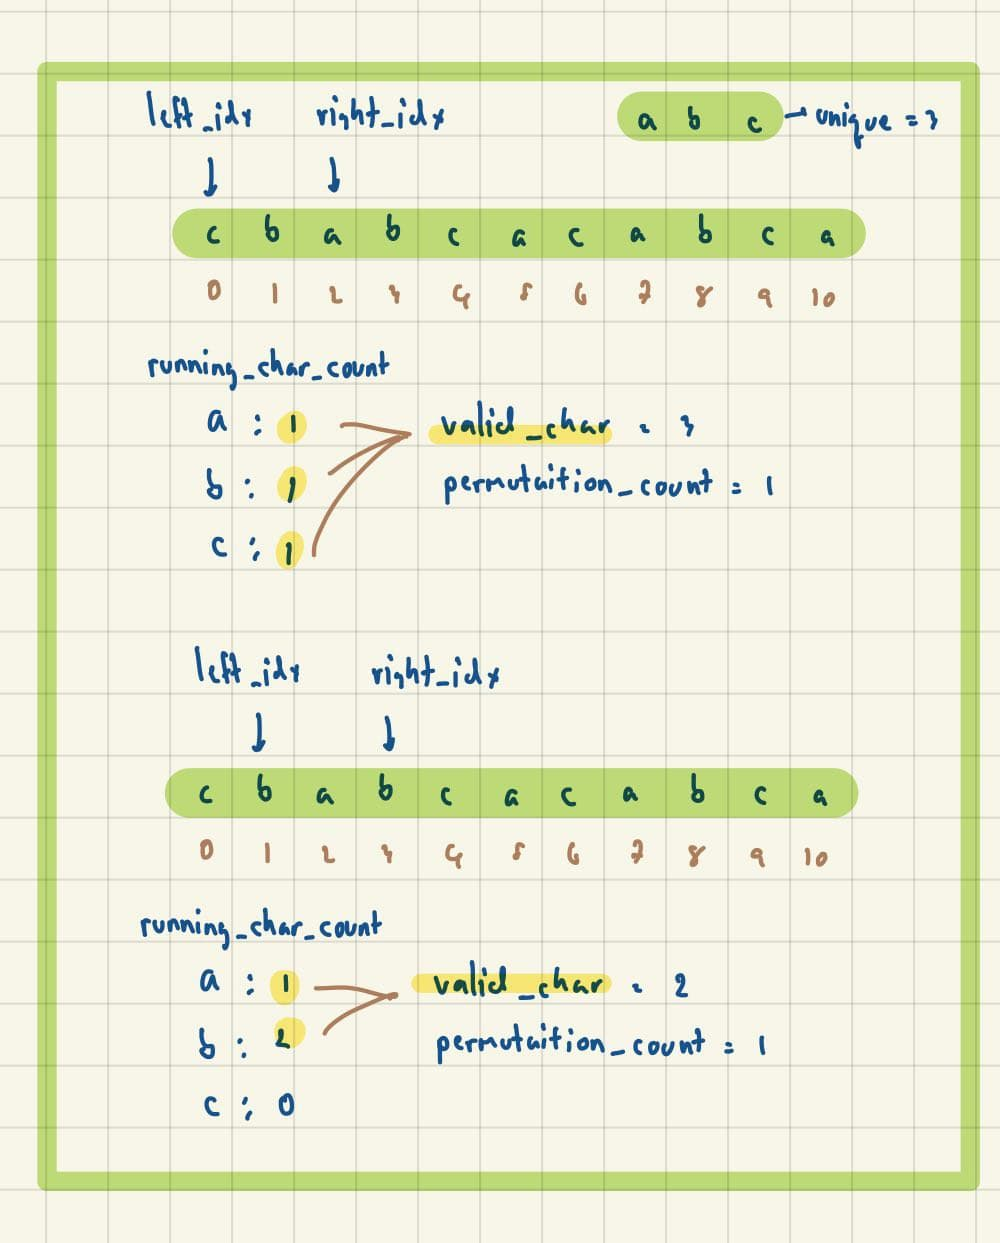